<center><h1>Mini Project 6</h1></center>
<br>
<center><font size="5">Name - Spandan Patil</font></center>
<br>
<center><font size="4">APS Failure Data</font></center>

## 1. Tree-Based Methods

Import packages

In [71]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from IPython.display import Image
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### (a) Download the APS Failure data

In [72]:
# Here we are reading the training set from the csv file and relpace the "na" with NaN.
train_set = pd.read_csv("../data/aps_failure_training_set.csv", skiprows=20)
train_set.replace(["na"], np.nan, inplace=True)
train_set.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [73]:
# Here we are splitting the training set into input and output features.
train_X = train_set[train_set.columns[1:]]
train_y = train_set[train_set.columns[0]]

In [74]:
# Here we are reading the testing set from the csv file and relpace the "na" with NaN.
test_set = pd.read_csv("../data/aps_failure_test_set.csv", skiprows=20)
test_set.replace(["na"], np.nan, inplace=True)
test_set.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [75]:
# Here we are splitting the testing set into input and output features.
test_X = test_set[test_set.columns[1:]]
test_y = test_set[test_set.columns[0]]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

<b> We can use the following techniques for dealing with missing values:</b><br>
<ul>
    <li> <b>Imputation with the Mean/Median/Mode</b> - For numerical features, we can replace missing values with the mean or median of the feature's values.
    <li> <b>K-Nearest Neighbors (KNN) Imputation</b> - Using the K-nearest neighbors of each missing value to impute it. Thuis works by finding the K-nearest neighbors based on other features and taking the average to fill in the missing values.
    <li> <b>Model-Based Imputation</b> - Predict the missing values using machine learning models such as regression, decision trees, or deep learning methods.
</ul>

For this dataset, I am going to apply the Mean Imputation.

In [76]:
# Here we are performing mean imputation on the training set.
imputer = SimpleImputer(strategy='mean')
train_X = pd.DataFrame(imputer.fit_transform(train_X), columns=train_X.columns)
train_X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [77]:
# Here we are using the same values fitting in training set imputation for the test set also.
test_X = pd.DataFrame(imputer.transform(test_X), columns=test_X.columns)
test_X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.713189,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.713189,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [78]:
# Here we are creating the completed dataset for data visualization and analysis purpose. 
dataset_X = pd.concat([train_X, test_X], ignore_index=True)
dataset_y = pd.concat([train_y, test_y], ignore_index=True)

#### (ii) Calculate the coefficient of variation

In [79]:
cv = dataset_X.std() / dataset_X.mean()
print(cv.to_string())

aa_000      4.328608
ab_000      2.207351
ac_000      2.167798
ad_000    193.955307
ae_000     22.282263
af_000     18.196998
ag_000     91.351287
ag_001     42.175077
ag_002     17.648387
ag_003      8.758654
ag_004      5.476671
ag_005      2.964655
ag_006      2.352723
ag_007      2.812592
ag_008      6.275128
ag_009     32.176826
ah_000      2.315850
ai_000     18.517977
aj_000     43.153543
ak_000     78.559993
al_000      9.115901
am_0        9.071049
an_000      2.254516
ao_000      2.276390
ap_000      3.086376
aq_000      2.853898
ar_000     10.565228
as_000    114.464381
at_000     23.192859
au_000     86.293581
av_000      5.736370
ax_000      3.860192
ay_000     40.987933
ay_001     49.305161
ay_002     38.356789
ay_003     28.334262
ay_004     33.025195
ay_005     12.002267
ay_006      3.022028
ay_007      3.250151
ay_008      3.944938
ay_009     77.457761
az_000      9.020516
az_001      7.376191
az_002     12.050090
az_003      7.566040
az_004      2.838066
az_005      3

#### (iii) Plot a correlation matrix

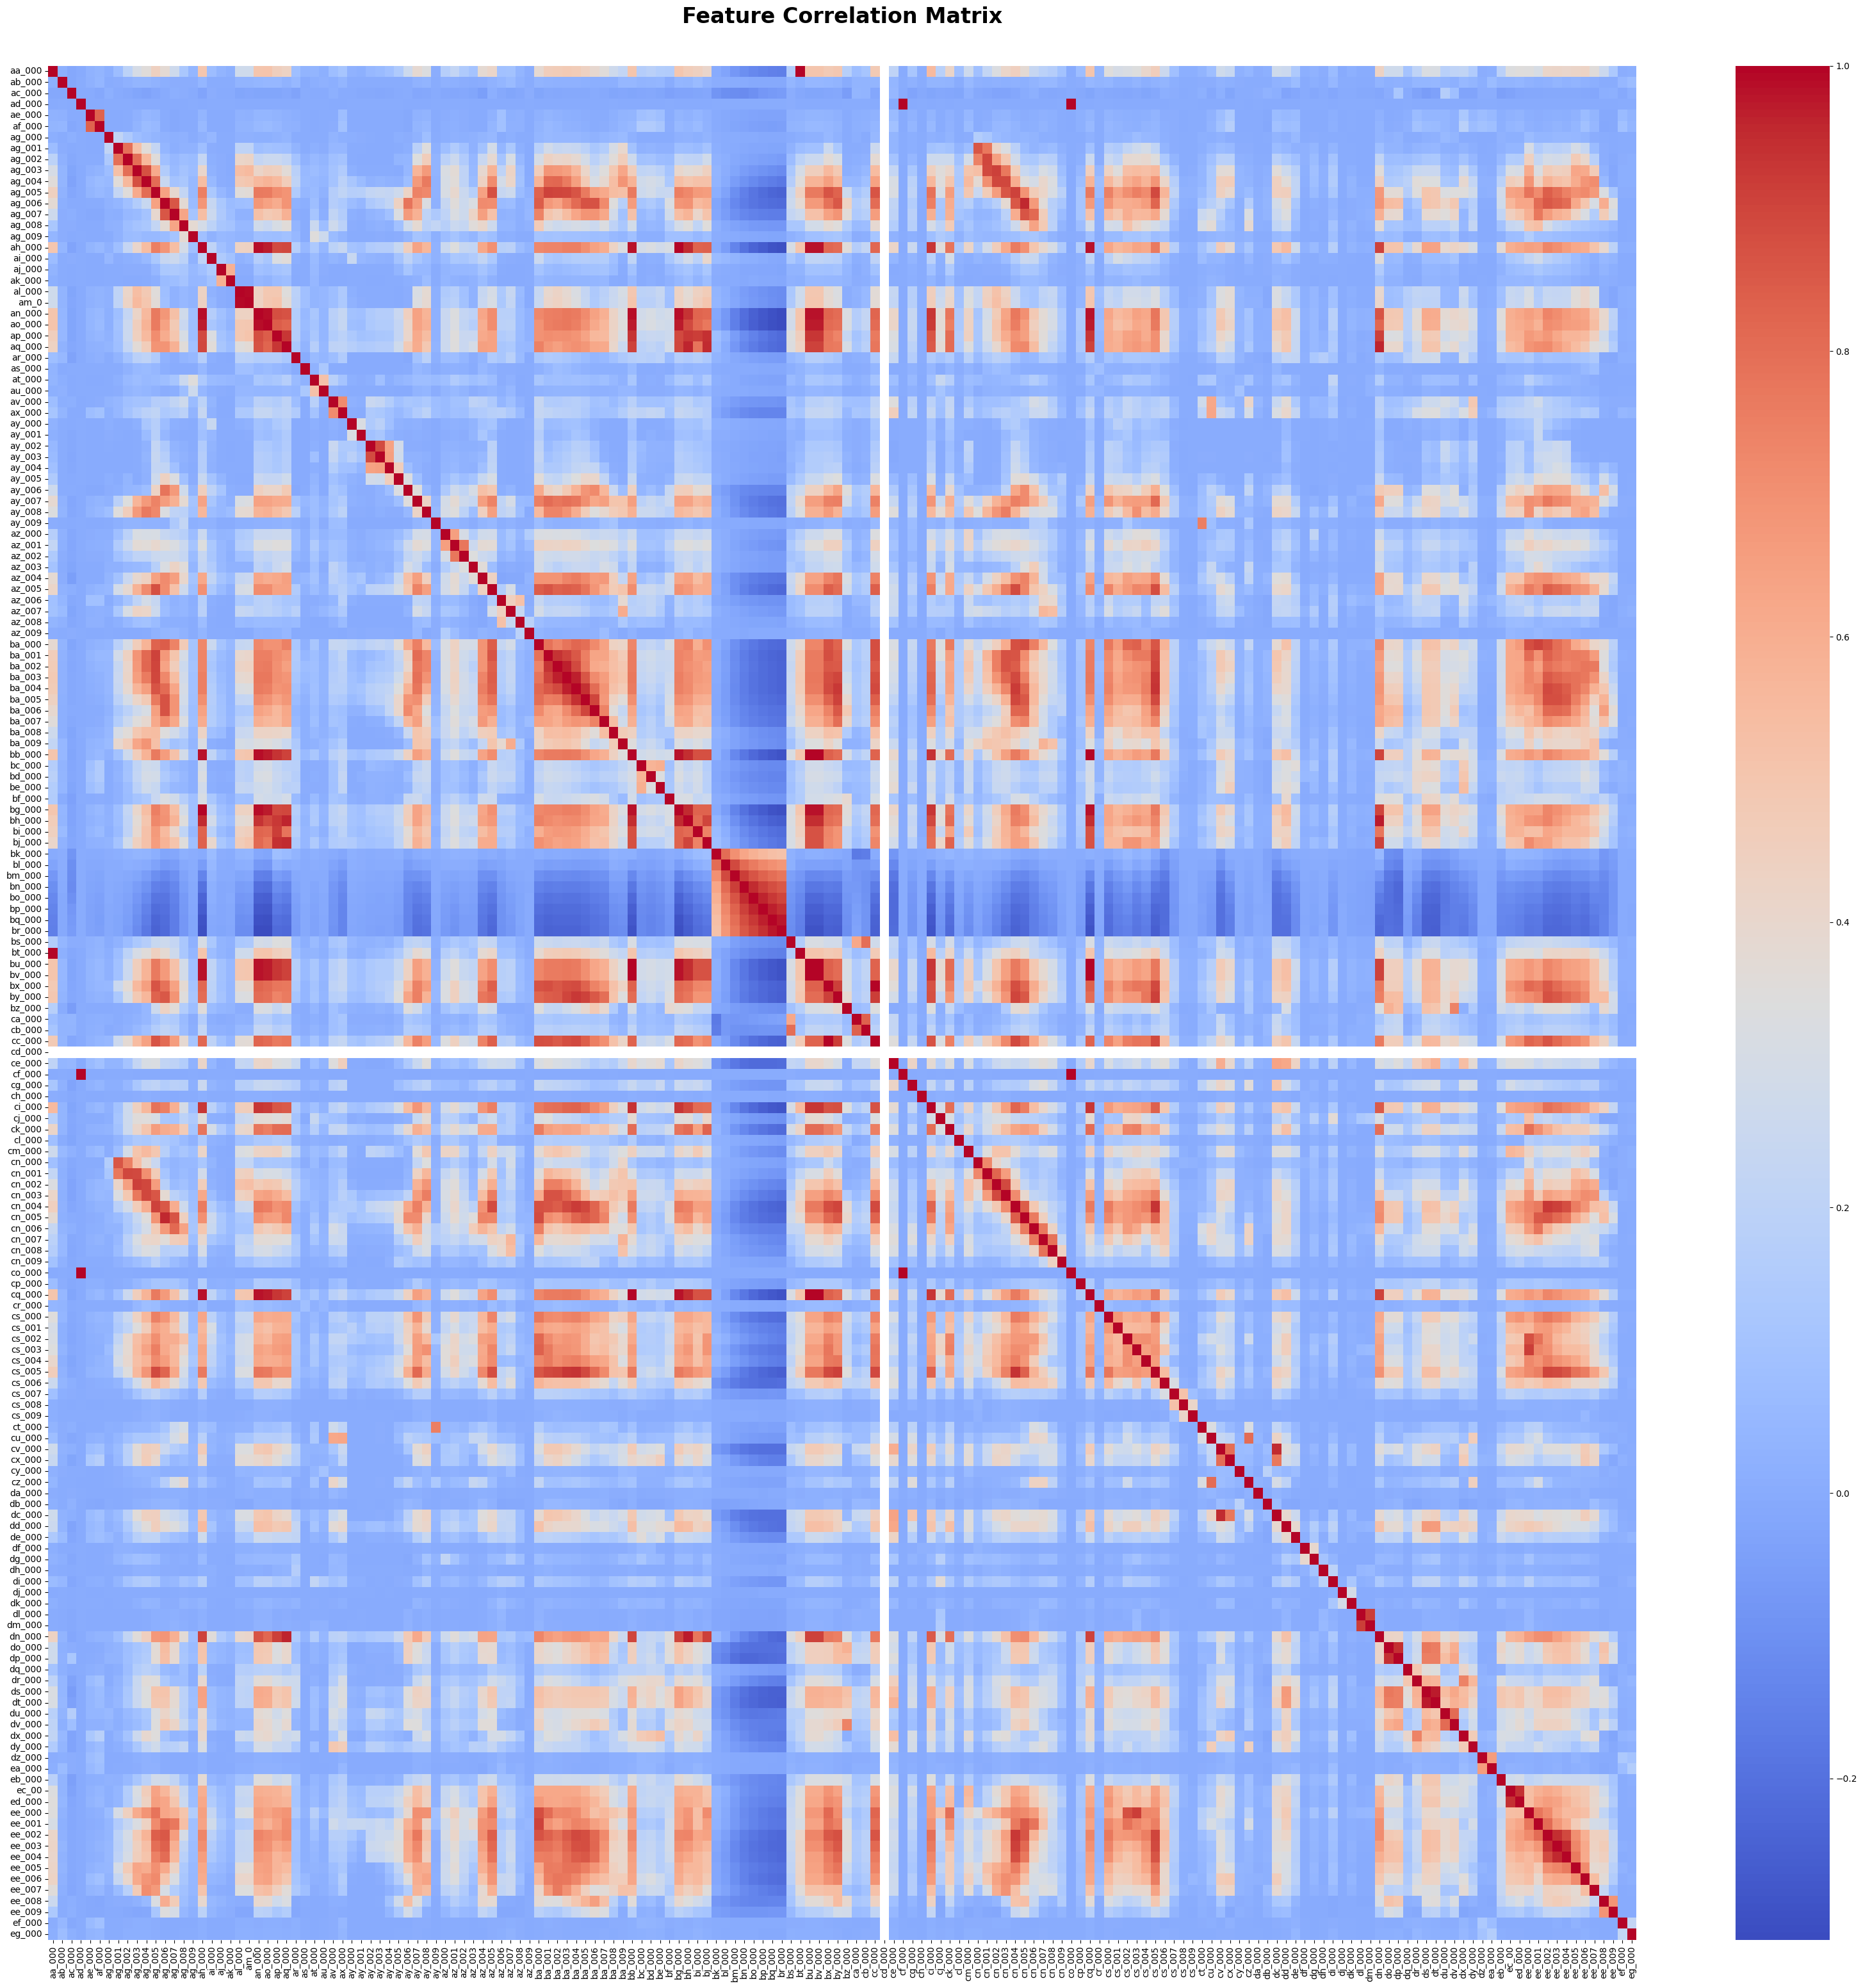

In [80]:
# Here we are plotting the correlation matrix of the features.
corr_matrix = dataset_X.corr()

plt.figure(figsize=(40, 38))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Feature Correlation Matrix", fontsize=24, y=1.02, fontweight='bold')
plt.show()

#### (iv) Make scatter plots and box plots

In [81]:
# Here we are getting the list of highest CV features
highest_cv_features = cv.nlargest(math.floor(math.sqrt(170)))
highest_cv_features

cf_000    194.438323
co_000    194.089168
ad_000    193.955307
cs_009    193.045035
dj_000    120.084900
df_000    116.138172
as_000    114.464381
dh_000    111.946396
ag_000     91.351287
au_000     86.293581
ak_000     78.559993
az_009     77.894525
ay_009     77.457761
dtype: float64

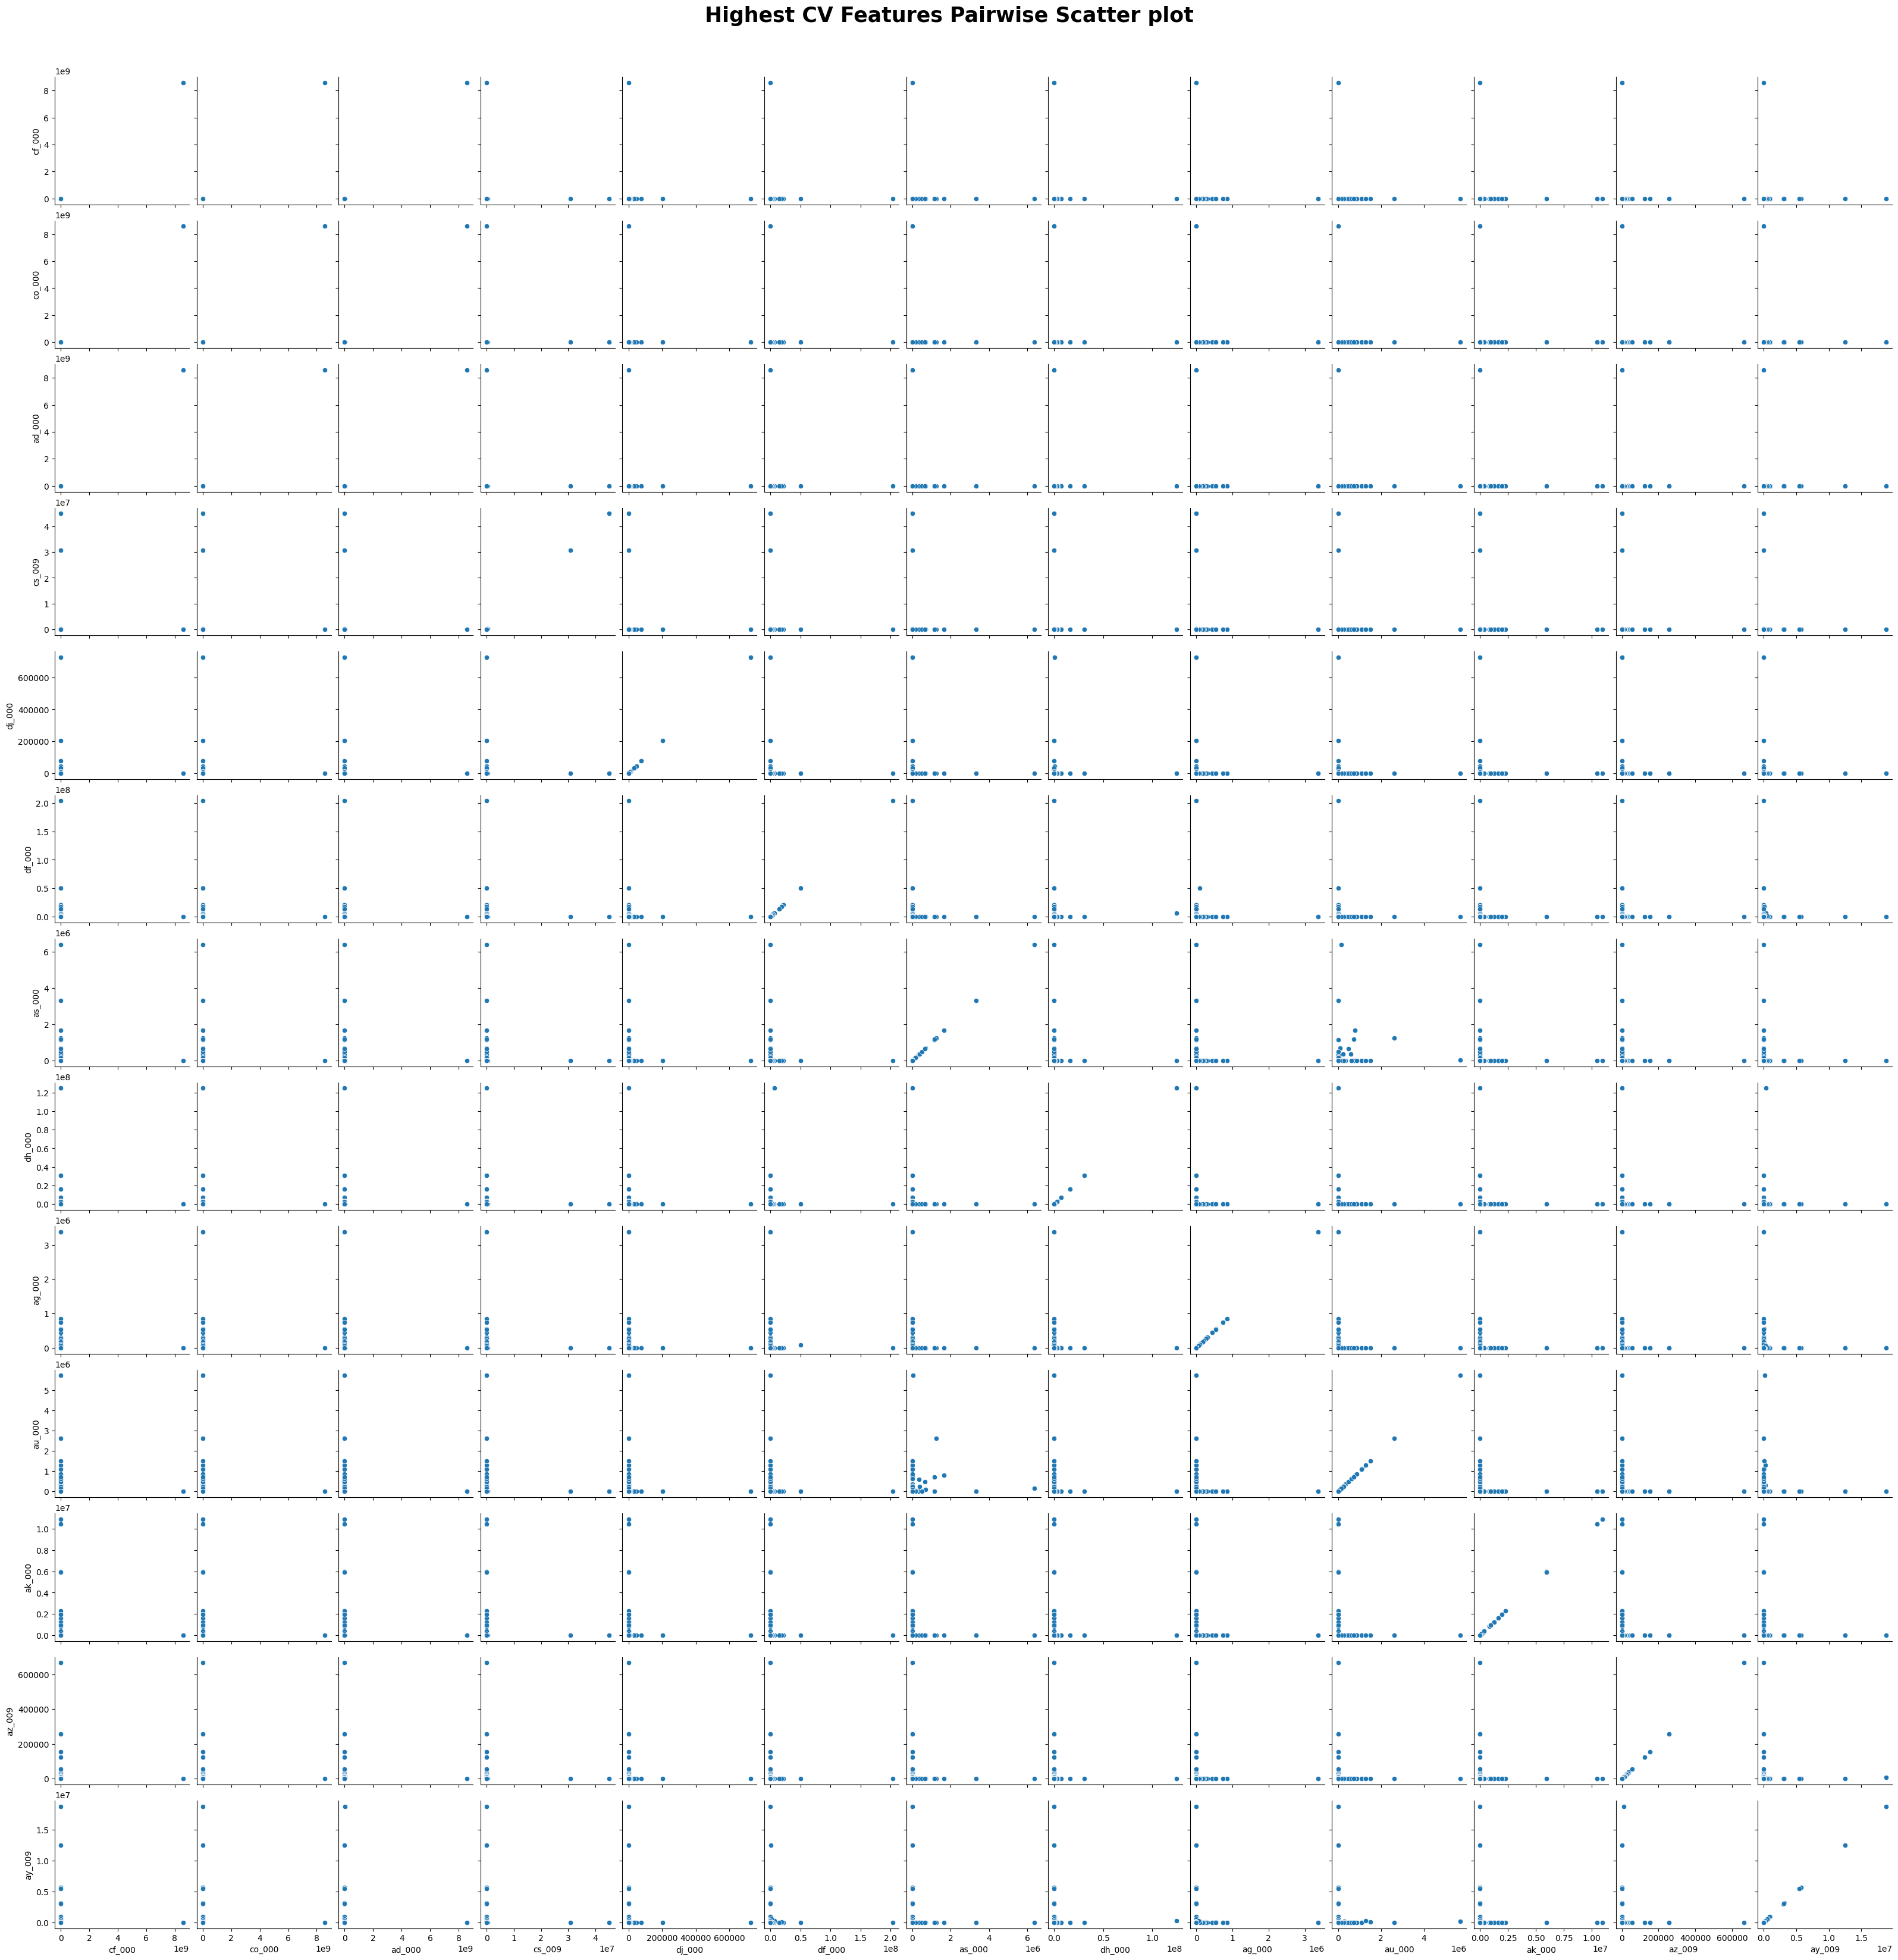

In [82]:
# Here we are plotting a pairwise scatter plot for these features.
sns.pairplot(dataset_X[highest_cv_features.index], diag_kind=None)
plt.suptitle("Highest CV Features Pairwise Scatter plot", y=1.02, fontsize=25, fontweight='bold')
plt.show()

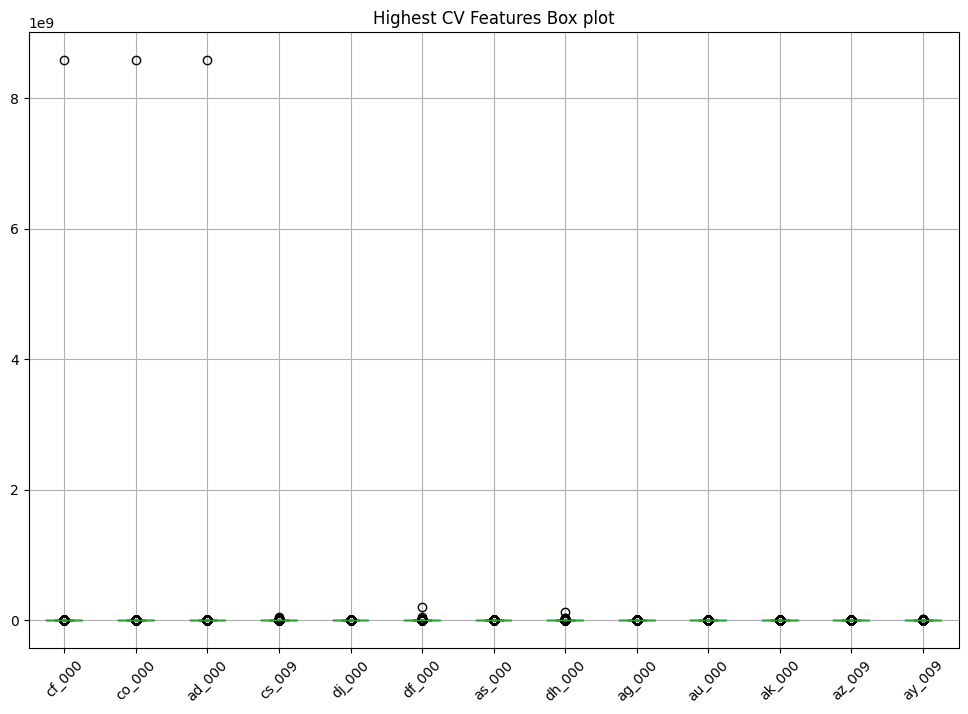

In [83]:
# Here we are plotting a boxplot for this highest cv features.
plt.figure(figsize=(12, 8))
dataset_X[highest_cv_features.index].boxplot(rot=45)
plt.title("Highest CV Features Box plot")
plt.show()

Just from looking at the Scatter plot and box plot, I dont think we can determine which feature is significant or not.

#### (v) Is this data set imbalanced?

In [84]:
dataset_y.value_counts()

class
neg    74625
pos     1375
Name: count, dtype: int64

As we can see above this dataset is severely imbalance, with just nearly 1% of datapoints as the positive class and rest of the datapoints are negative class.

### (c) Train a random forest

In [85]:
# We are fitting an Random Forest Classifier to our dataset and calculating the confusion matrix, ROC, AUC, and misclassification for training and test sets. And also the Out of Bag error estimate.
rf = RandomForestClassifier(random_state=21, oob_score=True, max_depth=5)
rf.fit(train_X, train_y)

# Here we are getting train and test predictions
train_y_pred = rf.predict(train_X)
test_y_pred = rf.predict(test_X)

# Here we are calculating the train and test Confusion Matrix
conf_matrix_train = confusion_matrix(train_y, train_y_pred)
conf_matrix_test = confusion_matrix(test_y, test_y_pred)

# Here we are calculating the train and test ROC and AUC curves.

train_y_numeric = train_y.map({'neg': 0, 'pos': 1})
test_y_numeric = test_y.map({'neg': 0, 'pos': 1})

fpr_train, tpr_train, _ = roc_curve(train_y_numeric, rf.predict_proba(train_X)[:, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_numeric, rf.predict_proba(test_X)[:, 1])

roc_auc_train = roc_auc_score(train_y_numeric, rf.predict_proba(train_X)[:, 1])
roc_auc_test = roc_auc_score(test_y_numeric, rf.predict_proba(test_X)[:, 1])

# Here we are determining the train and test Misclassification Error.
train_error = 1 - accuracy_score(train_y, train_y_pred)
test_error = 1 - accuracy_score(test_y, test_y_pred)

# Here we are getting OOB Error for our Random Forest Classifier
oob_error = 1 - rf.oob_score_


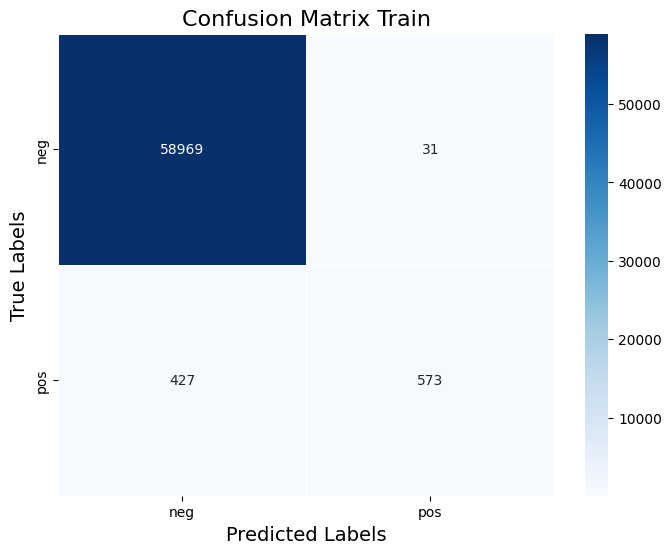

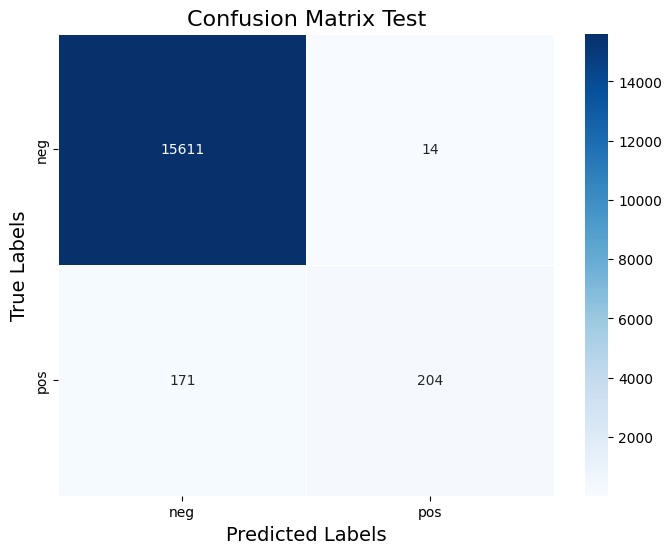

Train Misclassification Error: 0.0076
Test Misclassification Error: 0.0116
Out of Bag Error: 0.0092
ROC AUC (Train): 0.9863
ROC AUC (Test): 0.9931


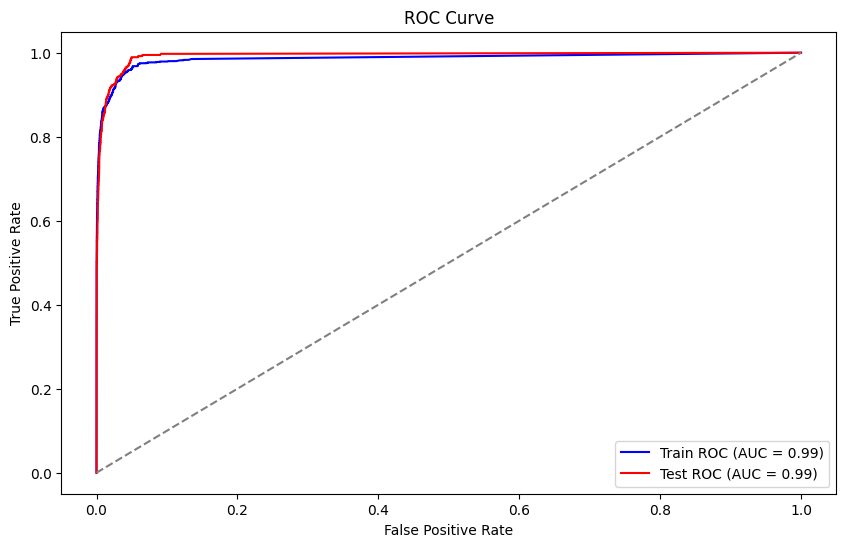

In [86]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Train', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Test', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


print(f"Train Misclassification Error: {train_error:.4f}")
print(f"Test Misclassification Error: {test_error:.4f}")
print(f"Out of Bag Error: {oob_error:.4f}")


print(f"ROC AUC (Train): {roc_auc_train:.4f}")
print(f"ROC AUC (Test): {roc_auc_test:.4f}")
# Here we are ploting the train and test Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### (d) Research class imbalance in random forest

<b> The following are the techniques which can be used to better handle imbalance classes in random forest :</b>
<ul>
    <li><b>Assigning Class Weights</b> - Incorporating class weights into the Random Forest classifier allows the model to penalize misclassifications of the minority class more heavily. This approach encourages the model to pay more attention to the minority class during training.
    <li><b>Balanced Random Forest (BRF)</b> - It creates bootstrap samples for each tree by undersampling the majority class to match the number of minority class samples, ensuring each tree is trained on a balanced dataset. 
    <li><b> SMOTE</b> - It generates synthetic samples for the minority class, balancing the dataset and improving the classifier's ability to predict minority class instances. 
</ul>

In this case, I am going to use Assigning Class Weight Technique.

In [87]:
# We are fitting an balanced Random Forest Classifier to our dataset and calculating the confusion matrix, ROC, AUC, and misclassification for training and test sets. And also the Out of Bag error estimate.
rf = RandomForestClassifier(random_state=21, oob_score=True, class_weight='balanced', max_depth=5)
rf.fit(train_X, train_y)

# Here we are getting train and test predictions
train_y_pred = rf.predict(train_X)
test_y_pred = rf.predict(test_X)

# Here we are calculating the train and test Confusion Matrix
conf_matrix_train = confusion_matrix(train_y, train_y_pred)
conf_matrix_test = confusion_matrix(test_y, test_y_pred)

# Here we are calculating the train and test ROC and AUC curves.
train_y_numeric = train_y.map({'neg': 0, 'pos': 1})
test_y_numeric = test_y.map({'neg': 0, 'pos': 1})

fpr_train, tpr_train, _ = roc_curve(train_y_numeric, rf.predict_proba(train_X)[:, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_numeric, rf.predict_proba(test_X)[:, 1])

roc_auc_train = roc_auc_score(train_y_numeric, rf.predict_proba(train_X)[:, 1])
roc_auc_test = roc_auc_score(test_y_numeric, rf.predict_proba(test_X)[:, 1])

# Here we are determining the train and test Misclassification Error.
train_error = 1 - accuracy_score(train_y, train_y_pred)
test_error = 1 - accuracy_score(test_y, test_y_pred)

# Here we are getting OOB Error for our Random Forest Classifier
oob_error = 1 - rf.oob_score_


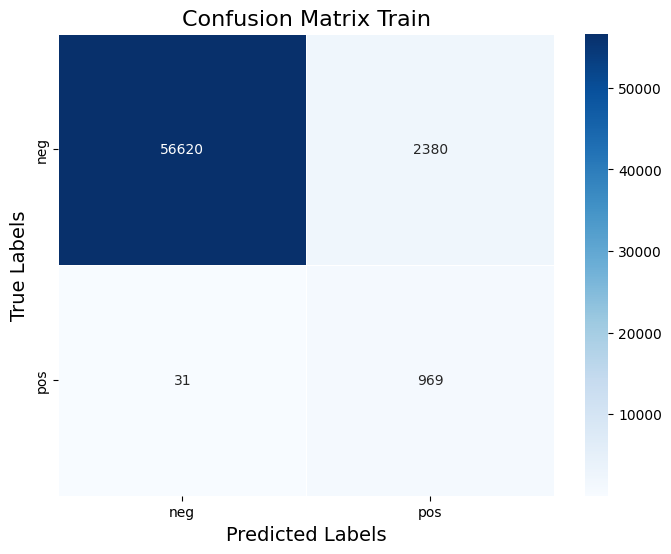

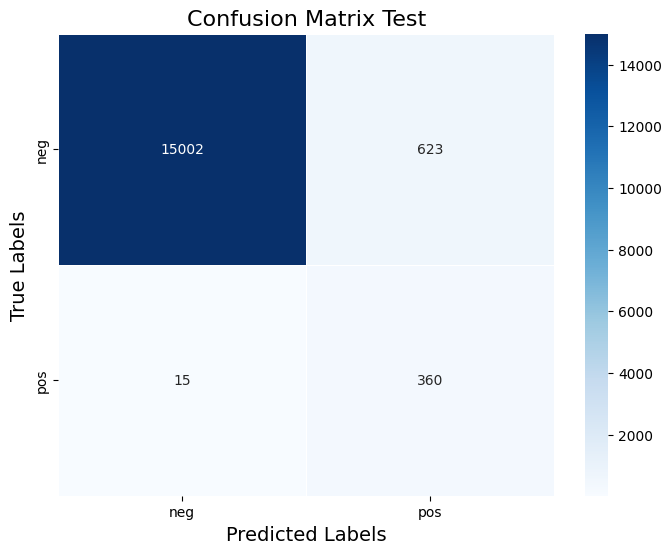

Train Misclassification Error: 0.0402
Test Misclassification Error: 0.0399
Out of Bag Error: 0.0415
ROC AUC (Train): 0.9890
ROC AUC (Test): 0.9893


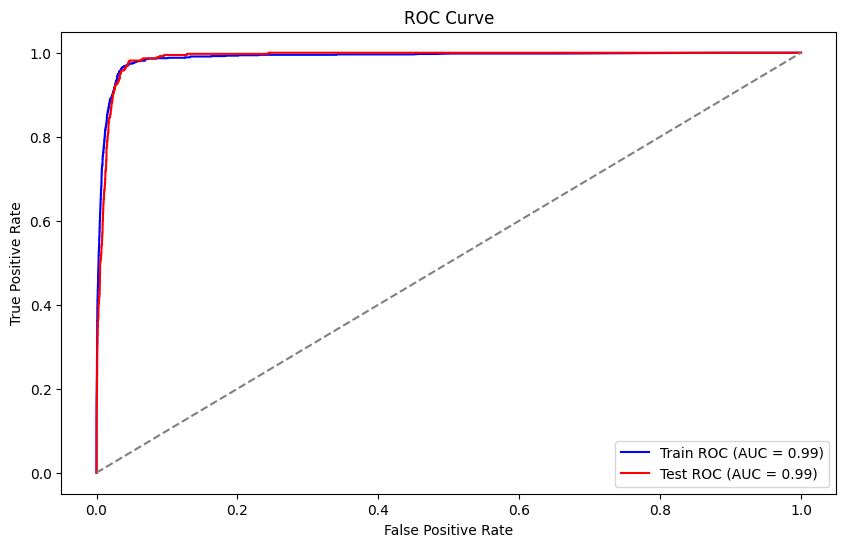

In [88]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Train', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Test', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


print(f"Train Misclassification Error: {train_error:.4f}")
print(f"Test Misclassification Error: {test_error:.4f}")
print(f"Out of Bag Error: {oob_error:.4f}")


print(f"ROC AUC (Train): {roc_auc_train:.4f}")
print(f"ROC AUC (Test): {roc_auc_test:.4f}")
# Here we are ploting the train and test Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

As we can see from above that although the test misclassification error has increased after applying the class weight techniques, but the number of positive class datapoints being correctly classified has aslo increased. Before : 204/375 After: 360/375  

### (e) XGBoost and Model Trees

In [89]:
# Here we are encoding our string labels into binary numeric labels.
train_y_numeric = train_y.map({'neg': 0, 'pos': 1})
test_y_numeric = test_y.map({'neg': 0, 'pos': 1})

# We are fitting an XGBoost Logistic Regression Classifier to our dataset and calculating the confusion matrix, ROC, AUC, and misclassification for training and test sets.
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Here we are doing Hyperparameter tuning (Finding best L1 regularization term) with 5-fold cross validation.
param_grid = {'reg_alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(train_X, train_y_numeric)

best_model = grid_search.best_estimator_
print(f"Best regularization term: {grid_search.best_params_}")


# Here we are using 5-fold cross-validation to estimate training error
cv_scores = cross_val_score(best_model, train_X, train_y_numeric, cv=5, scoring='accuracy')
cv_error = 1 - np.mean(cv_scores)
print(f"Estimated Train cross-validation error: {cv_error:.4f}")


# Here we are using the best_model to calculate the training and test confusion matrix, ROC, AUC.
best_model.fit(train_X, train_y_numeric)

train_y_pred = best_model.predict(train_X)
test_y_pred = best_model.predict(test_X)

test_error = 1 - accuracy_score(test_y_numeric, test_y_pred)
print(f"Test error: {test_error:.4f}")

# Here we are calculating the train and test Confusion Matrix
conf_matrix_train = confusion_matrix(train_y_numeric, train_y_pred)
conf_matrix_test = confusion_matrix(test_y_numeric, test_y_pred)

# Here we are calculating the train and test ROC and AUC curves.
fpr_train, tpr_train, _ = roc_curve(train_y_numeric, best_model.predict_proba(train_X)[:, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_numeric, best_model.predict_proba(test_X)[:, 1])

roc_auc_train = roc_auc_score(train_y_numeric, best_model.predict_proba(train_X)[:, 1])
roc_auc_test = roc_auc_score(test_y_numeric, best_model.predict_proba(test_X)[:, 1])

Best regularization term: {'reg_alpha': 0.8286427728546842}
Estimated Train cross-validation error: 0.0060
Test error: 0.0066


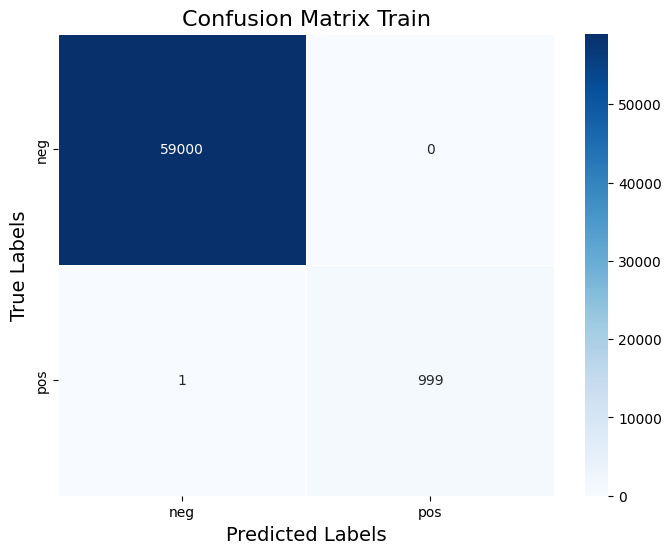

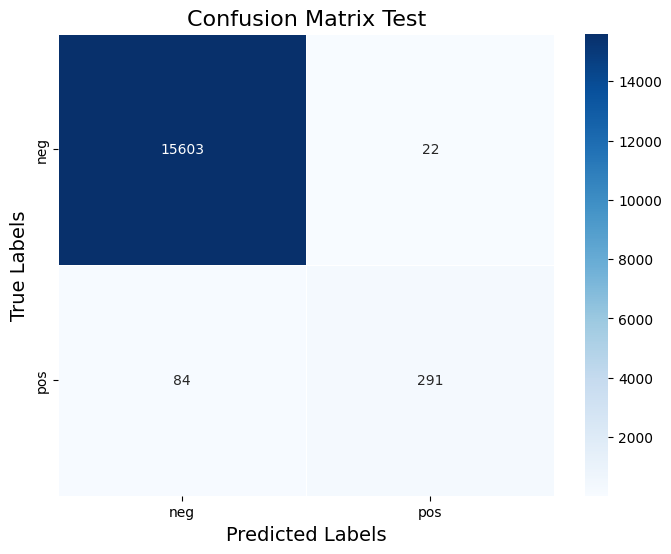

ROC AUC (Train): 1.0000
ROC AUC (Test): 0.9944


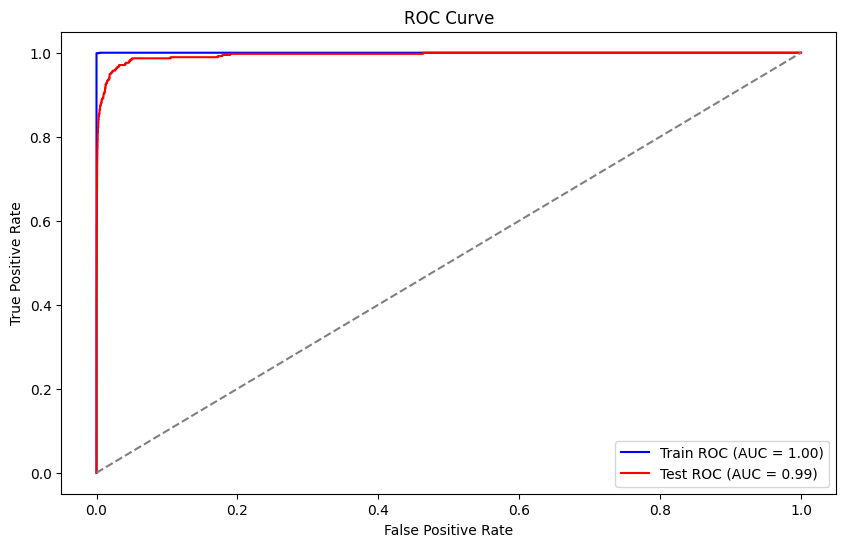

In [90]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Train', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Test', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


print(f"ROC AUC (Train): {roc_auc_train:.4f}")
print(f"ROC AUC (Test): {roc_auc_test:.4f}")
# Here we are ploting the train and test Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### (f) Use SMOTE to pre-process your data

In [91]:
# Here we are encoding our string labels into binary numeric labels.
train_y_numeric = train_y.map({'neg': 0, 'pos': 1})
test_y_numeric = test_y.map({'neg': 0, 'pos': 1})

# Here we are applying the SMOTE for class imbalance compensation
smote = SMOTE(sampling_strategy='auto', random_state=21)
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y_numeric)

# We are fitting an XGBoost Logistic Regression Classifier to our SMOTE dataset and calculating the confusion matrix, ROC, AUC, and misclassification for training and test sets.
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Here we are doing Hyperparameter tuning (Finding best L1 regularization term) with 5-fold cross validation.
param_grid = {'reg_alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(train_X_smote, train_y_smote)

best_model = grid_search.best_estimator_
print(f"Best regularization term: {grid_search.best_params_}")

# Here we are using 5-fold cross-validation to estimate training error
cv_scores = cross_val_score(best_model, train_X_smote, train_y_smote, cv=5, scoring='accuracy')
cv_error = 1 - np.mean(cv_scores)
print(f"Estimated Train cross-validation error: {cv_error:.4f}")


# Here we are using the best_model to calculate the training and test confusion matrix, ROC, AUC.
best_model.fit(train_X_smote, train_y_smote)

train_y_pred = best_model.predict(train_X_smote)
test_y_pred = best_model.predict(test_X)
test_error = 1 - accuracy_score(test_y_numeric, test_y_pred)
print(f"Test error: {test_error:.4f}")

# Here we are calculating the train and test Confusion Matrix
conf_matrix_train = confusion_matrix(train_y_smote, train_y_pred)
conf_matrix_test = confusion_matrix(test_y_numeric, test_y_pred)

# Here we are calculating the train and test ROC and AUC curves.
fpr_train, tpr_train, _ = roc_curve(train_y_smote, best_model.predict_proba(train_X_smote)[:, 1])
fpr_test, tpr_test, _ = roc_curve(test_y_numeric, best_model.predict_proba(test_X)[:, 1])

roc_auc_train = roc_auc_score(train_y_smote, best_model.predict_proba(train_X_smote)[:, 1])
roc_auc_test = roc_auc_score(test_y_numeric, best_model.predict_proba(test_X)[:, 1])

Best regularization term: {'reg_alpha': 0.18420699693267145}
Estimated Train cross-validation error: 0.0024
Test error: 0.0071


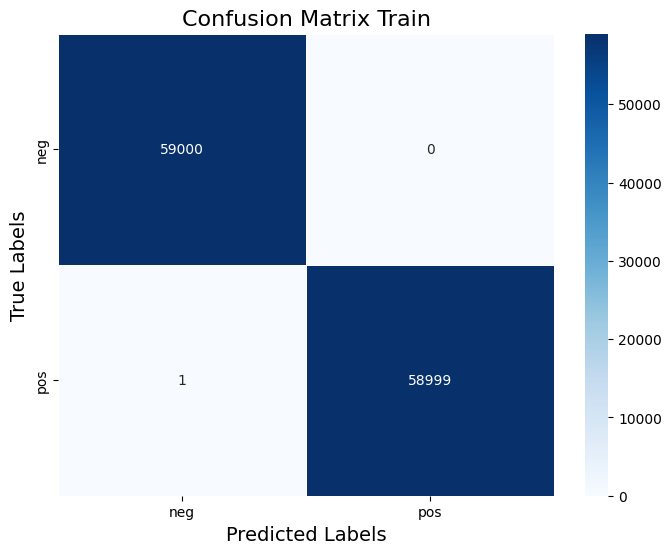

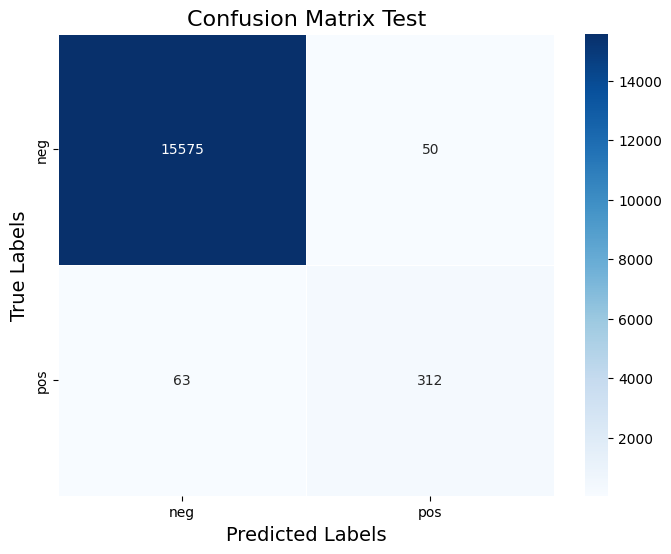

ROC AUC (Train): 1.0000
ROC AUC (Test): 0.9930


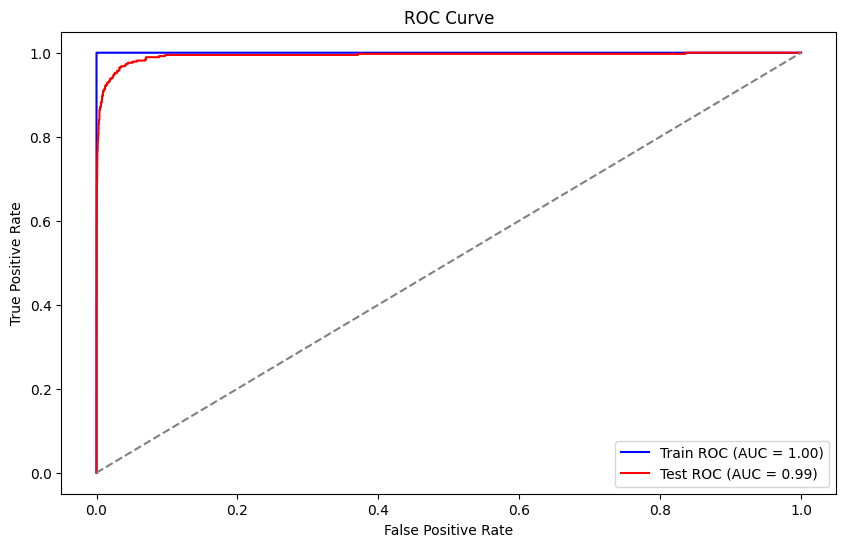

In [92]:
# Here we are creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Train', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Here we are creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=True, 
            xticklabels=train_y.unique(), yticklabels=train_y.unique())
# Set labels and title
plt.title('Confusion Matrix Test', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()



print(f"ROC AUC (Train): {roc_auc_train:.4f}")
print(f"ROC AUC (Test): {roc_auc_test:.4f}")
# Here we are ploting the train and test Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Comparing the uncompensated case with SMOTE case, we can see that overall training error has decrease in the smote case and the test error has increasing. But in the test set we can see that the number of true positives being predicted as positives has increased. Thus, we can say that in the smote case, the classification accuracy of the minority class has increased. 

## 2. ISLR 6.6.3

<ol type="a">
    <li><b>Training RSS => iv. Steadily Decreases: </b> Since we are increasing the value of s from zero, the value of lambda will start decreasing from inf, thus the constraints we have on the coefficients Betas will relax, allowing the model to better fit the training data.
    <li><b>Testing RSS => ii. Decrease initially, and then eventually start increasing in a U shape: </b> Since we are increasing the value of s from zero, the value of lambda will start decreasing from inf, thus the constraints we have on the coefficients Betas will relax, allowing the model to better fit the training data. But as this goes on it will result in overfitting on the training data, that is when the test RSS will start increaing in a U shape.
    <li><b>Variance => iii. Steadily increase: </b> Since we are increasing the value of s from zero, the value of lambda will start decreasing from inf, thus the value of coefficient Betas will start increaing from 0, thus making our model more flexible, hence increasing the variance.
    <li><b>Bias => iv. Steadily decrease: </b> Since we are increasing the value of s from zero, the value of lambda will start decreasing from inf, thus the constraints we have on the coefficients Betas will relax, allowing the model to better fit the training data. And As we know that Bias is related to training error and also due to the bias-variance trade off, since our variance is increasing the bias will decrease.
    <li><b>Irreducible Error => v. Remain constant: </b> Since irreducible error is the act of god, and is not controlled by any of the ML methods.s
</ol>

## 3. ISLR 6.6.5

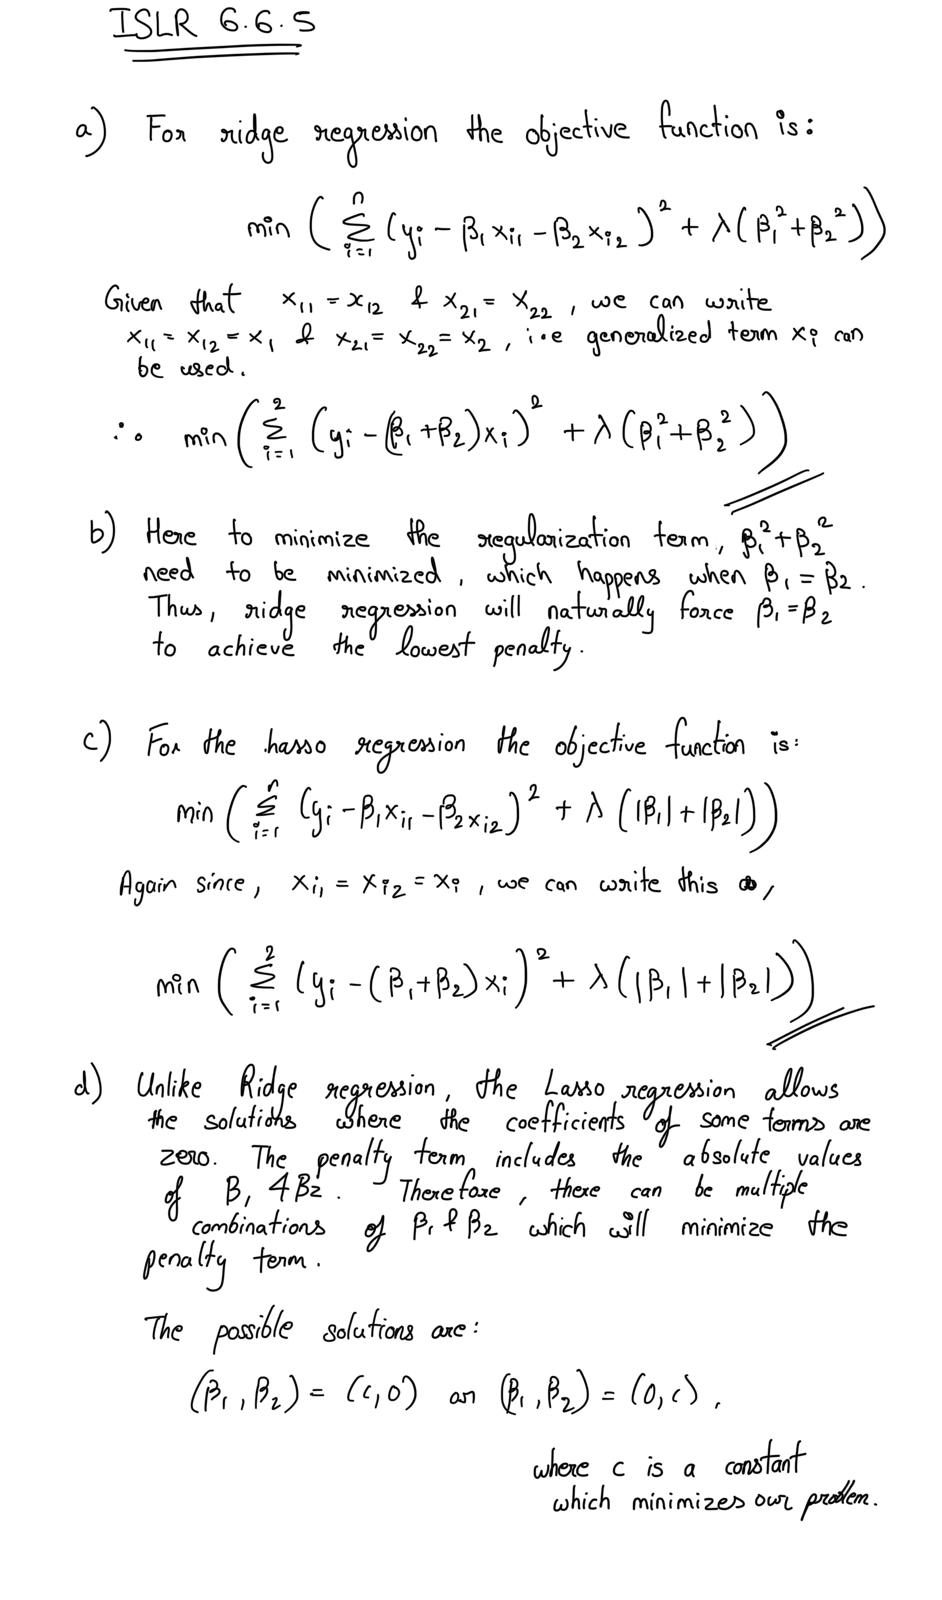

In [93]:
Image("../data/ISLR_6.6.5.jpg")

## 4. ISLR 8.4.5

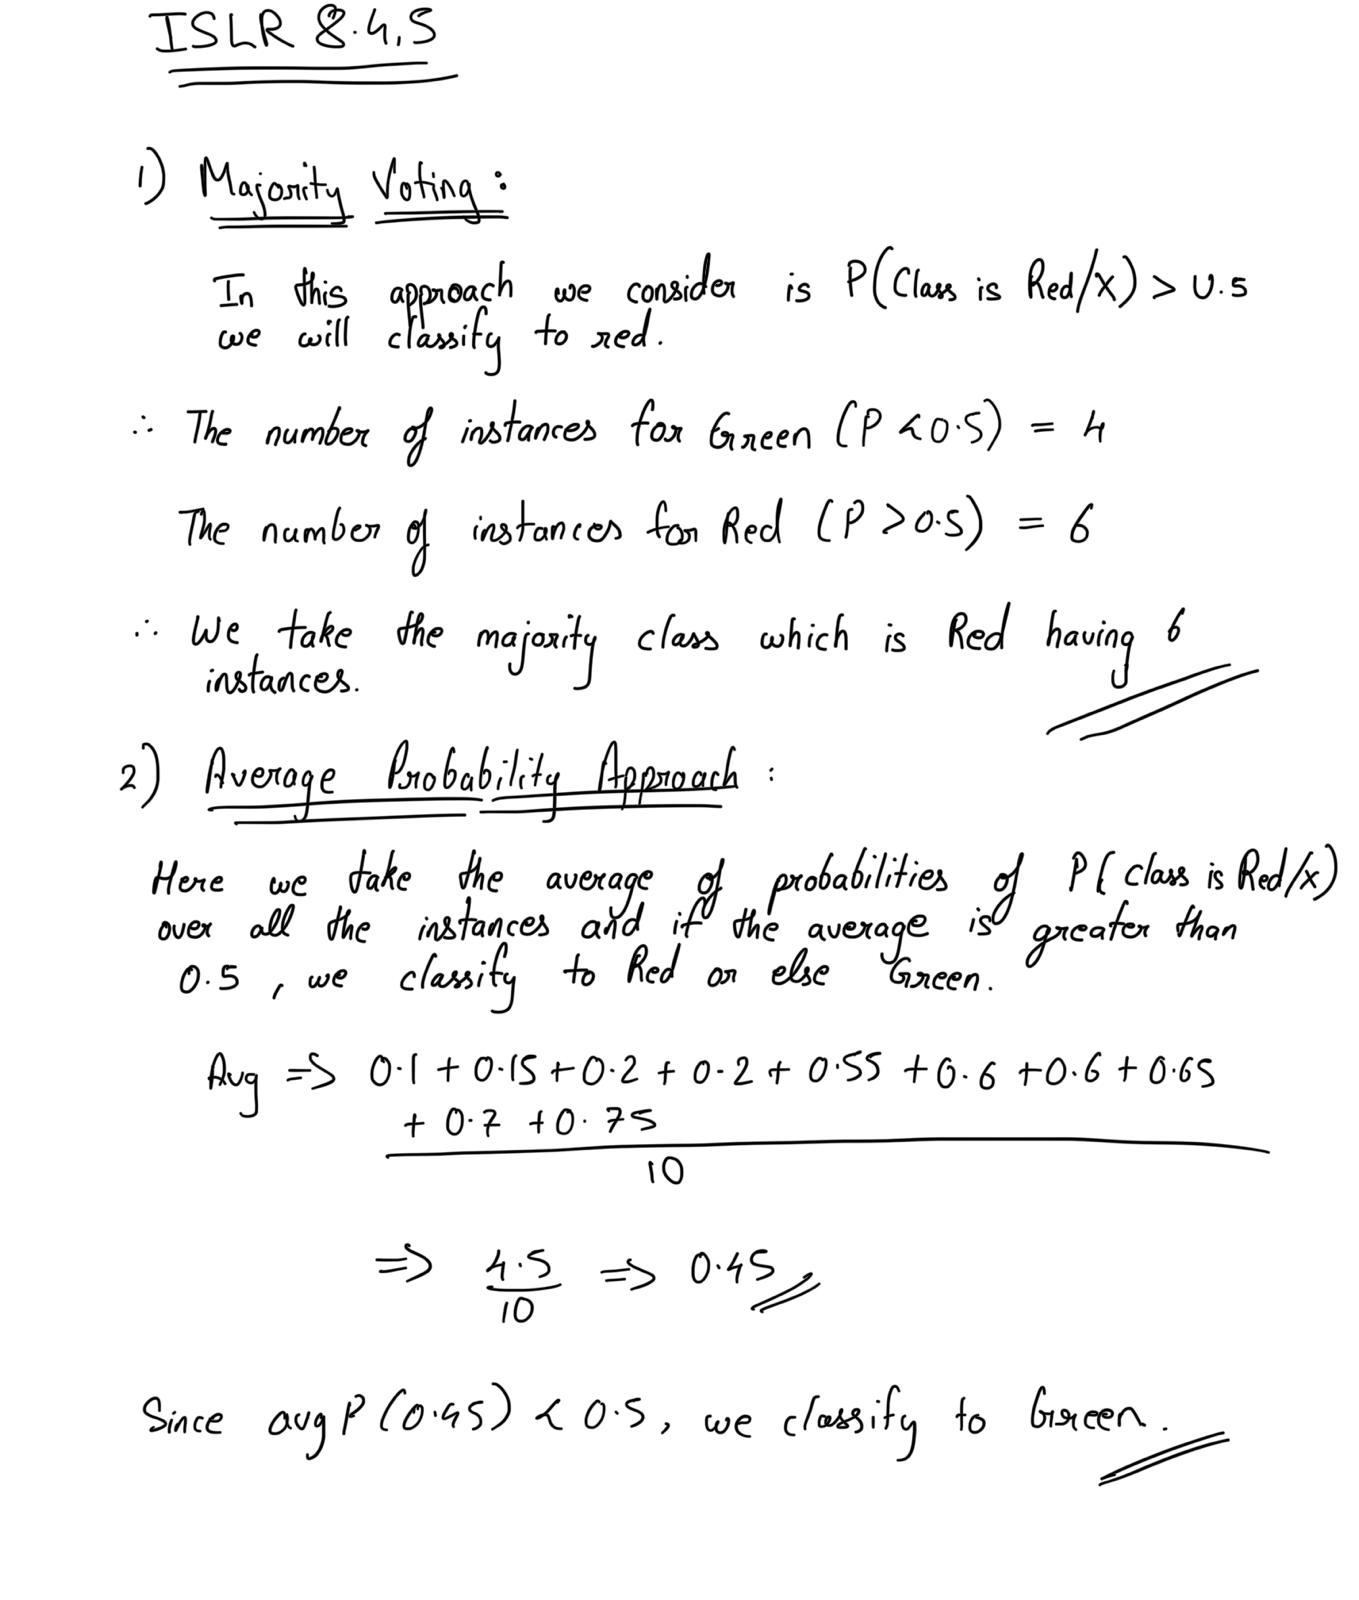

In [94]:
Image("../data/ISLR_8.4.5.jpg")

## 5. ISLR 9.7.3

### a) Sketch the observations

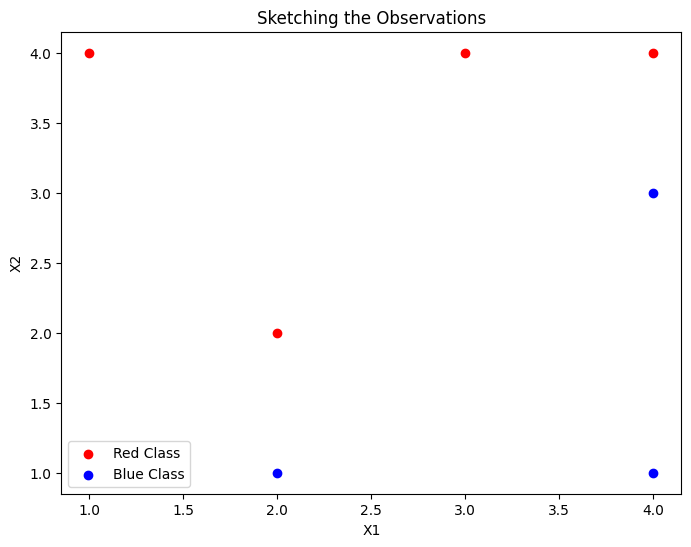

In [95]:
inp_features = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
target = np.array([1, 1, 1, 1, -1, -1, -1])  # Red = 1, Blue = -1

plt.figure(figsize=(8, 6))
plt.scatter(inp_features[target == 1, 0], inp_features[target == 1, 1], color='red', label='Red Class')
plt.scatter(inp_features[target == -1, 0], inp_features[target == -1, 1], color='blue', label='Blue Class')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sketching the Observations')
plt.legend()
plt.show()

### b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane

The equation of the hyperplane is => -x1 + x2 + 0.5 = 0

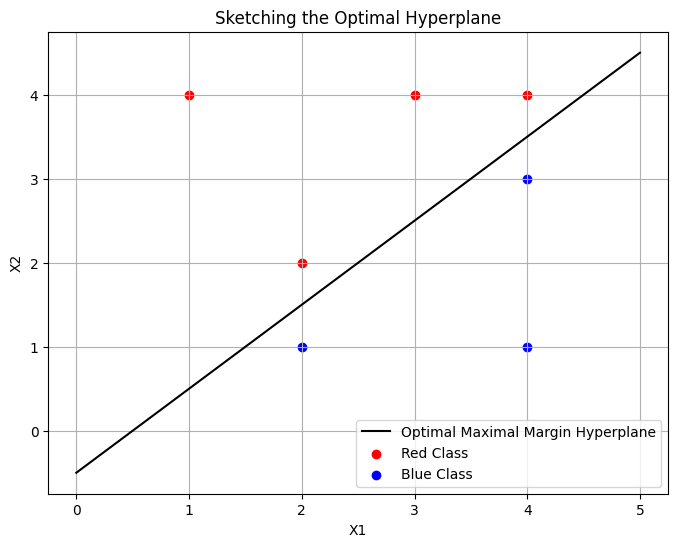

In [96]:
x1 = np.linspace(0, 5, 100)
x2 = x1 - 0.5

plt.figure(figsize=(8, 6))
plt.plot(x1, x2, 'k-', label='Optimal Maximal Margin Hyperplane')
plt.scatter(inp_features[target == 1, 0], inp_features[target == 1, 1], color='red', label='Red Class')
plt.scatter(inp_features[target == -1, 0], inp_features[target == -1, 1], color='blue', label='Blue Class')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sketching the Optimal Hyperplane')
plt.grid()
plt.legend()
plt.show()


### c) Describe the classification rule for the maximal margin classifier

RED => β0 + β1 * X1 + β2 * X2 > 0 <br>
BLUE => β0 + β1 * X1 + β2 * X2 < 0 <br>
(β0, β1, β2) => (0.5, -1, 1)

### d) On your sketch, indicate the margin for the maximal margin hyperplane

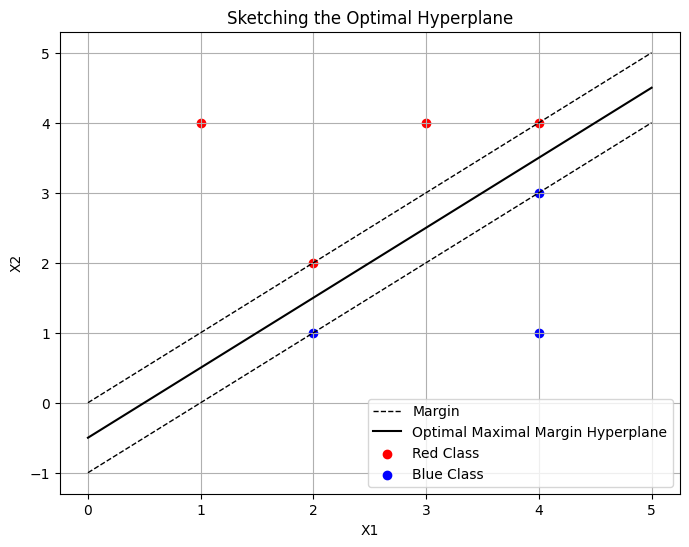

In [97]:
margin = 0.5
x2_m1 = x1 - 0.5 + margin
x2_m2 = x1 - 0.5 - margin
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_m1, 'k--', linewidth=1, label='Margin')
plt.plot(x1, x2_m2, 'k--', linewidth=1)
plt.plot(x1, x2, 'k-', label='Optimal Maximal Margin Hyperplane')
plt.scatter(inp_features[target == 1, 0], inp_features[target == 1, 1], color='red', label='Red Class')
plt.scatter(inp_features[target == -1, 0], inp_features[target == -1, 1], color='blue', label='Blue Class')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sketching the Optimal Hyperplane')
plt.grid()
plt.legend()
plt.show()

### e) Indicate the support vectors for the maximal margin classifier

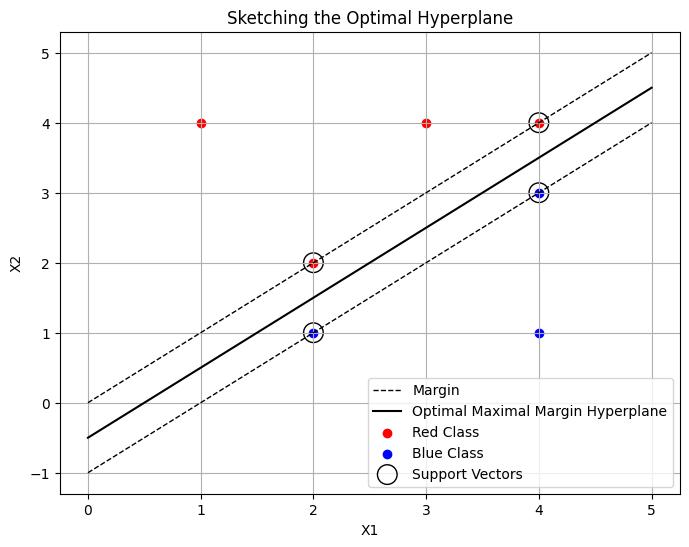

In [98]:
support_vectors = np.array([[2,2], [4,4], [2,1], [4,3]])


plt.figure(figsize=(8, 6))
plt.plot(x1, x2_m1, 'k--', linewidth=1, label='Margin')
plt.plot(x1, x2_m2, 'k--', linewidth=1)
plt.plot(x1, x2, 'k-', label='Optimal Maximal Margin Hyperplane')
plt.scatter(inp_features[target == 1, 0], inp_features[target == 1, 1], color='red', label='Red Class')
plt.scatter(inp_features[target == -1, 0], inp_features[target == -1, 1], color='blue', label='Blue Class')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='black', label='Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sketching the Optimal Hyperplane')
plt.grid()
plt.legend()
plt.show()

### f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

Since the seventh observation [4, 1] is not a support vector, and is far away from the margins, thus slight movement of it wont affect the maximal margin hyperplane

### g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane

The equation of the hyperplane is => -0.74 * x1 + 0.8 * x2 + 0.5 = 0

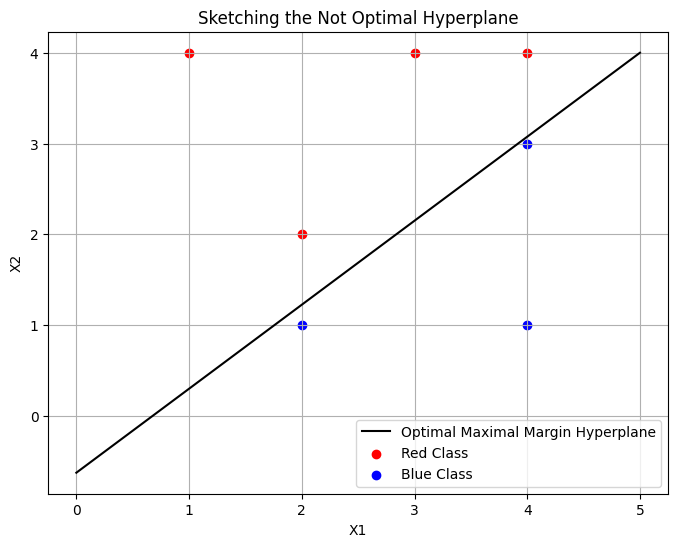

In [99]:
not_opt_x2 = (0.74 * x1 - 0.5) / 0.8

plt.figure(figsize=(8, 6))
plt.plot(x1, not_opt_x2, 'k-', label='Optimal Maximal Margin Hyperplane')
plt.scatter(inp_features[target == 1, 0], inp_features[target == 1, 1], color='red', label='Red Class')
plt.scatter(inp_features[target == -1, 0], inp_features[target == -1, 1], color='blue', label='Blue Class')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sketching the Not Optimal Hyperplane')
plt.grid()
plt.legend()
plt.show()

### h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane

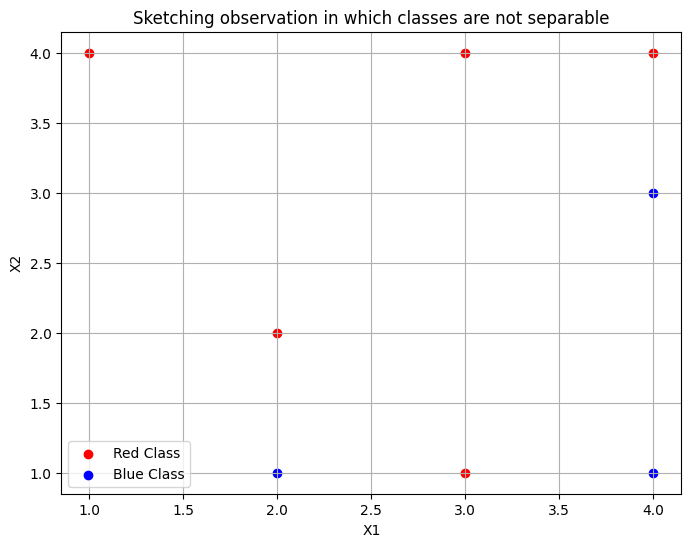

In [100]:
inp_features = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1], [3, 1]])
target = np.array([1, 1, 1, 1, -1, -1, -1, 1])

plt.figure(figsize=(8, 6))
plt.scatter(inp_features[target == 1, 0], inp_features[target == 1, 1], color='red', label='Red Class')
plt.scatter(inp_features[target == -1, 0], inp_features[target == -1, 1], color='blue', label='Blue Class')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sketching observation in which classes are not separable')
plt.grid()
plt.legend()
plt.show()